radius = 
4
[[ 4.01039105 -0.09401438]
 [ 3.82931884  1.14053228]
 [ 3.46933538  2.16540997]
 [ 2.77414391  2.97871271]
 [ 1.87386482  3.50807759]
 [ 0.80766237  3.90875123]
 [-0.24864249  3.89552399]
 [-1.28086242  3.74102818]
 [-2.24763868  3.22181044]
 [-2.9973024   2.58591017]
 [-3.60025338  1.60123457]
 [-3.88403164  0.59504846]
 [-4.03907227 -0.5757837 ]
 [-3.71018661 -1.64441009]
 [-3.21857599 -2.46876545]
 [-2.2570754  -3.2289119 ]
 [-1.423521   -3.72865292]
 [-0.40332364 -4.05964999]
 [ 0.79255841 -3.83449478]
 [ 1.78459696 -3.64851937]
 [ 2.76729504 -2.93977739]
 [ 3.28110638 -2.23589256]
 [ 3.80962514 -1.13742603]
 [ 3.91899612 -0.02646726]
 [ 3.9068874   1.0199242 ]]


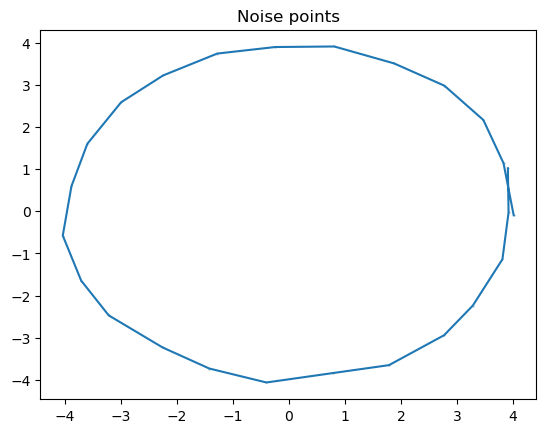

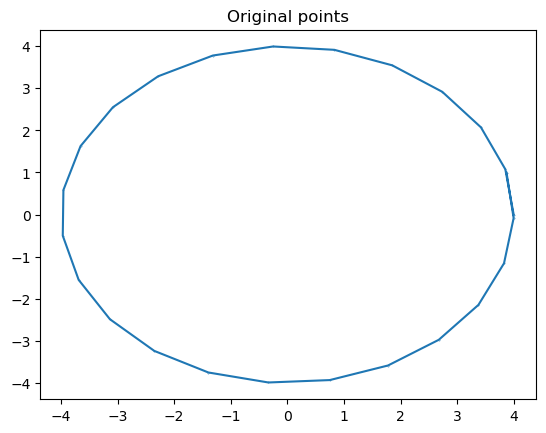

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def make_circle(r,phi):
    return r*np.cos(phi), r*np.sin(phi)

number_of_points = 25
# Make phis agles around the unit circle from 0 - 2pi
phis=np.arange(0,(13*math.pi)/6,((13*math.pi)/6)/number_of_points)

# Can use this below to generate random numbers from 
# r = random.uniform(1,10)
r = random.randint(1,10)
print("radius = ")
print(r)
x,y = make_circle(r, phis)

# Initialize arrays to empty values
x_noise = np.empty(len(x))
y_noise = np.empty(len(y))

# Give Random noise to the points
for i in range(len(x)):
    x_noise[i] = x[i] + random.uniform(-0.1,0.1)
    y_noise[i] = y[i] + random.uniform(-0.1,0.1)

input_data = np.array([x_noise,y_noise]).T
print(input_data)
#Plot the noise points
plt.plot(x_noise,y_noise,marker=".",markersize=0.5)
plt.title('Noise points')
plt.show()

    
# Plot the original points
plt.plot(x,y,marker=".",markersize=0.5)
plt.title('Original points')
plt.show()




In [185]:
# Make training dataset
def make_circle(r,phi):
    return r*np.cos(phi), r*np.sin(phi)

number_of_points = 25
# Make phis agles around the unit circle from 0 - 2pi
phis=np.arange(0,(13*math.pi)/6,((13*math.pi)/6)/number_of_points)

# Make blank array python
test = []
test_y = []
# Make a loop for saving all the training and the testing in variables
for j in range(100000): 
    # Can use this below to generate random numbers from 
    # r = random.uniform(1,10)
    r = random.randint(1,10)
    x,y = make_circle(r, phis)
    
    # Initialize arrays to empty values
    x_noise = np.empty(len(x))
    y_noise = np.empty(len(y))
    
    # Give Random noise to the points and normalize
    for i in range(len(x)):
        x_noise[i] = (x[i] + random.uniform(-0.1,0.1))/10
        y_noise[i] = (y[i] + random.uniform(-0.1,0.1))/10
    
    input_data = np.array([x_noise,y_noise]).T

    # Append to the blank array
    test.append(input_data)
    test_y.append(r-1)

# Make it a numpy array now
test = np.asarray(test)
test_y = np.asarray(test_y)

# Split the data into training and validation
X_valid, X_train = test[:20000],test[20000:]
Y_valid, Y_train = test_y[:20000],test_y[20000:]

# Class names
class_names = ["1","2","3","4","5","6","7","8","9","10"]

In [187]:
# Making a model
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten

# Create a sequential model
model = Sequential()

# Make a flatten layer that we will input 
model.add(Flatten(input_shape=(len(input_data),2)))
#Input and hidden layer
model.add(Dense(2, activation="relu"))

# Add final 1 neuron layer
#model.add(Dense(1))

# Maybe try a different output layer
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 2)                 102       
                                                                 
 dense_15 (Dense)            (None, 10)                30        
                                                                 
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.layers

In [189]:
# Hyperparameters for the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [191]:
# Training the model
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_valid,Y_valid),batch_size=32,verbose=1)

Epoch 1/10
2500/2500 [==============================] - 1s 325us/step - loss: 2.1894 - accuracy: 0.1731 - val_loss: 1.9480 - val_accuracy: 0.1990
Epoch 2/10
2500/2500 [==============================] - 1s 294us/step - loss: 1.7685 - accuracy: 0.2644 - val_loss: 1.6389 - val_accuracy: 0.3981
Epoch 3/10
2500/2500 [==============================] - 1s 291us/step - loss: 1.5588 - accuracy: 0.4326 - val_loss: 1.4945 - val_accuracy: 0.5003
Epoch 4/10
2500/2500 [==============================] - 1s 293us/step - loss: 1.4437 - accuracy: 0.5299 - val_loss: 1.4008 - val_accuracy: 0.5970
Epoch 5/10
2500/2500 [==============================] - 1s 291us/step - loss: 1.3643 - accuracy: 0.5733 - val_loss: 1.3344 - val_accuracy: 0.4984
Epoch 6/10
2500/2500 [==============================] - 1s 323us/step - loss: 1.3040 - accuracy: 0.6192 - val_loss: 1.2792 - val_accuracy: 0.6006
Epoch 7/10
2500/2500 [==============================] - 1s 298us/step - loss: 1.2552 - accuracy: 0.6432 - val_loss: 1.2398 -

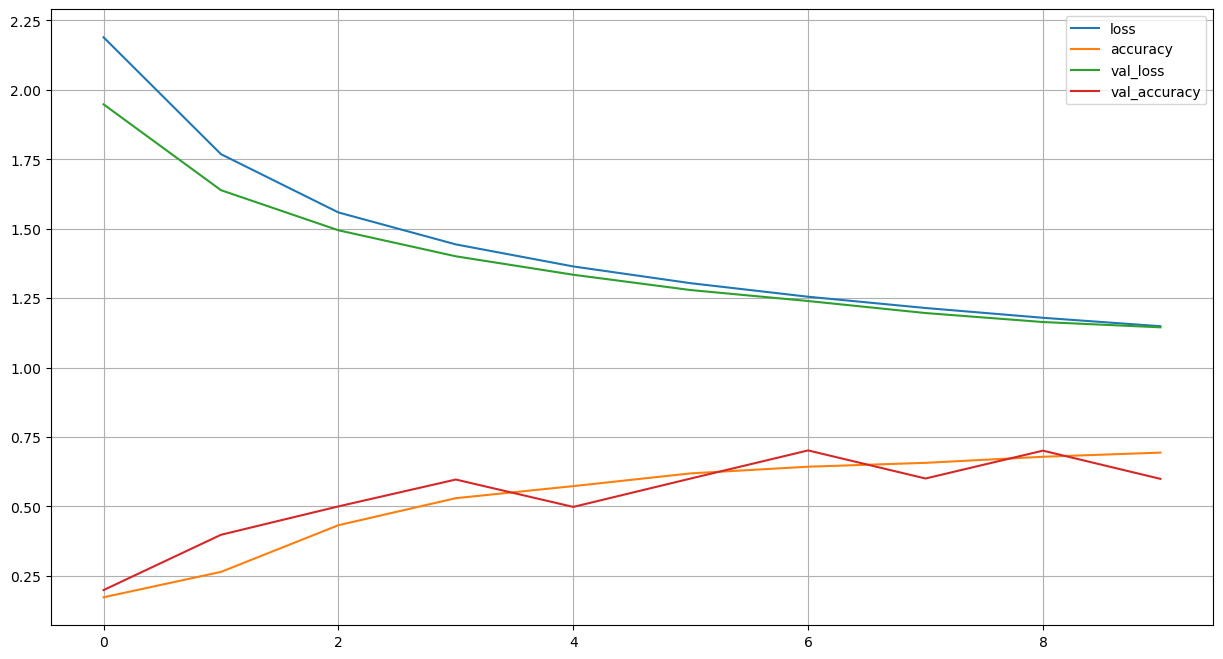

In [193]:
# Inspecting the results
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()


In [195]:
# Make some test data and evaluate on that
# Make blank array python
test = []
test_y = []
# Make a loop for saving all the training and the testing in variables
for j in range(1000): 
    # Can use this below to generate random numbers from 
    # r = random.uniform(1,10)
    r = random.randint(1,10)
    x,y = make_circle(r, phis)
    
    # Initialize arrays to empty values
    x_noise = np.empty(len(x))
    y_noise = np.empty(len(y))
    
    # Give Random noise to the points and normalize
    for i in range(len(x)):
        x_noise[i] = (x[i] + random.uniform(-0.1,0.1))/10
        y_noise[i] = (y[i] + random.uniform(-0.1,0.1))/10
    
    input_data = np.array([x_noise,y_noise]).T

    # Append to the blank array
    test.append(input_data)
    test_y.append(r-1)

# Make it a numpy array now
test = np.asarray(test)
test_y = np.asarray(test_y)

# Split the data into training and validation
X_test = test
Y_test = test_y

model.evaluate(X_test,Y_test)



32/32 [==============================] - 0s 347us/step - loss: 1.1413 - accuracy: 0.6100


[1.1412965059280396, 0.6100000143051147]

In [205]:
# See what the model is outputting
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)
print(Y_test)

32/32 [==============================] - 0s 325us/step
[6 2 0 3 2 6 3 0 2 8 6 3 2 4 6 8 4 0 8 8 6 6 0 2 4 0 8 4 0 0 6 8 3 8 8 8 0
 0 2 0 4 3 6 0 6 0 3 6 8 0 4 6 6 6 3 4 6 8 0 6 6 6 4 3 8 2 0 0 6 6 6 6 6 8
 4 8 8 0 8 2 0 6 3 3 8 3 8 6 0 0 8 3 8 3 2 6 3 4 4 0 3 8 4 6 6 8 0 0 6 0 8
 4 2 8 4 4 2 6 6 8 0 0 8 0 6 8 2 3 4 0 4 6 6 6 4 8 2 6 6 8 8 3 6 0 8 6 6 8
 6 6 8 6 2 2 4 8 6 4 8 8 6 8 2 8 6 8 3 6 8 8 4 8 6 0 8 8 6 8 4 8 8 0 0 6 6
 8 8 6 2 8 3 0 2 8 8 8 4 8 6 8 0 8 0 0 0 3 6 8 2 8 8 6 6 8 8 3 0 6 8 2 6 8
 2 3 6 0 8 8 0 8 8 8 6 0 6 8 2 0 6 8 0 8 0 8 8 8 6 8 3 6 0 6 0 4 0 2 8 0 4
 0 8 3 8 2 0 3 0 2 6 2 2 4 2 4 0 6 8 6 8 8 6 6 8 0 2 8 4 6 6 4 3 3 6 8 8 8
 0 0 2 3 8 6 2 6 4 6 8 0 8 0 4 6 6 8 8 2 6 8 4 8 0 0 3 6 4 6 4 3 6 2 0 8 4
 6 0 8 2 4 6 8 8 2 0 6 3 8 6 0 8 6 0 4 8 0 2 6 4 4 6 3 6 8 2 6 8 8 8 3 8 8
 3 4 2 3 8 3 3 4 6 4 0 3 4 3 4 3 2 3 6 8 6 0 2 8 2 4 4 4 2 4 0 8 2 6 6 8 8
 4 0 0 6 0 3 6 0 4 2 8 0 0 6 2 6 0 4 8 2 8 2 6 8 8 0 0 4 8 3 8 6 6 4 6 2 3
 0 6 0 8 3 8 8 8 0 0 8 8 8 2 0 8 8 2 0 0 0 3 

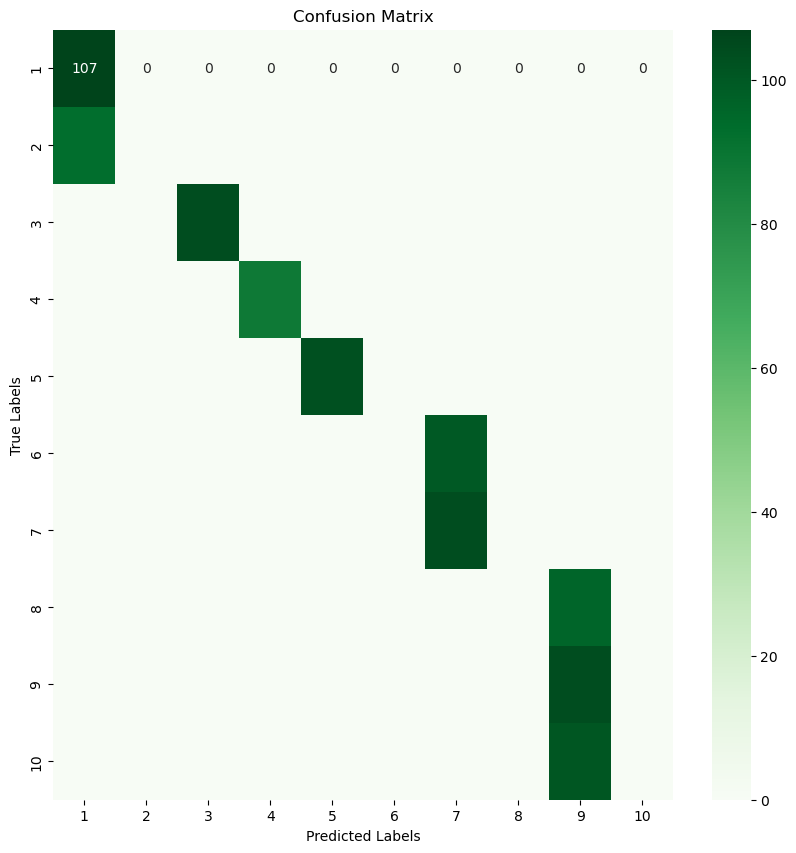

In [207]:
from tensorflow.math import confusion_matrix
import seaborn as sb

confusion_mat = confusion_matrix(Y_test,y_classes)

fig = sb.heatmap(confusion_mat, annot=True, fmt='g', cmap='Greens')
fig.set_xlabel('Predicted Labels')
fig.set_ylabel('True Labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10,10)

plt.show()